In [1]:
#-*- coding : utf-8 -*-
# coding: utf-8
import seaborn as sns
import pandas as pd
from patsy import dmatrices
import numpy as np
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

df = pd.DataFrame(pd.read_csv('iris_training.csv', encoding='gbk'))

In [2]:
df.iloc[0:5,1:3]

,花萼宽度,花瓣长度
0,2.8,5.6
1,2.3,3.3
2,2.5,4.5
3,3.1,1.5
4,3.8,1.7


In [3]:
df.isna().sum()

花萼长度    0
花萼宽度    0
花瓣长度    0
花瓣宽度    0
花种类     0
dtype: int64

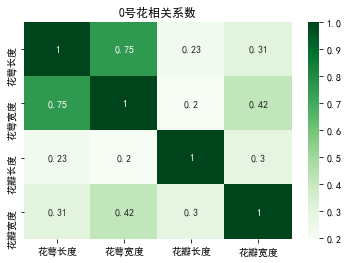

In [4]:
sns.heatmap(df.groupby('花种类').get_group(0).drop('花种类',axis=1).corr(),cmap="Greens",annot=True).set_title("0号花相关系数");

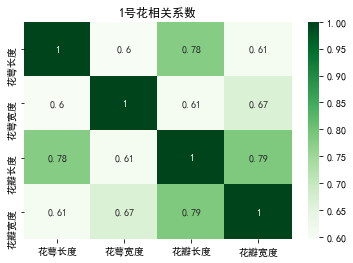

In [5]:
sns.heatmap(df.groupby('花种类').get_group(1).drop('花种类',axis=1).corr(),cmap="Greens",annot=True).set_title("1号花相关系数");

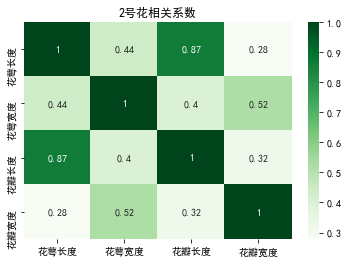

In [6]:
sns.heatmap(df.groupby('花种类').get_group(2).drop('花种类',axis=1).corr(),cmap="Greens",annot=True).set_title("2号花相关系数");

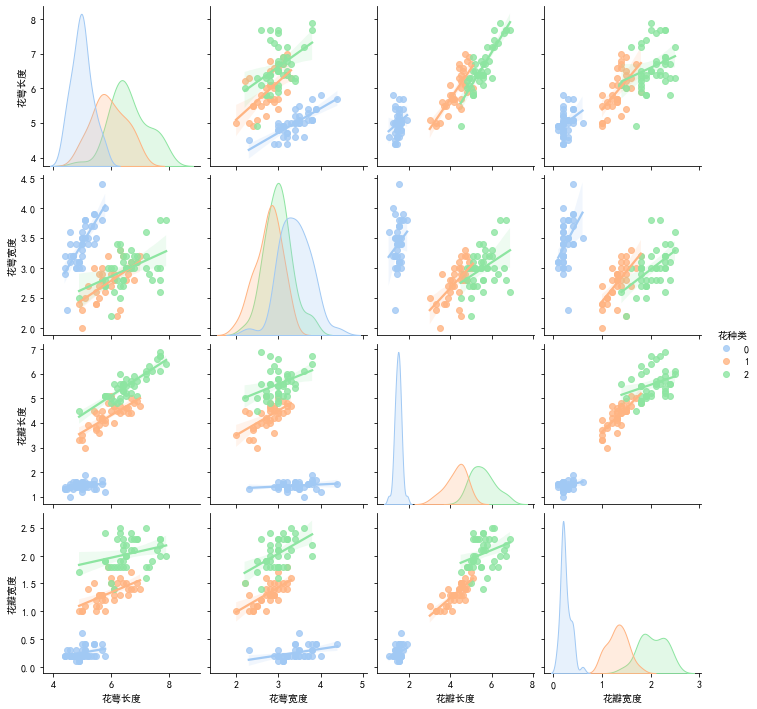

In [7]:
sns.pairplot(df,hue="花种类",kind="reg",palette="pastel",diag_kind="kde")

In [8]:
X=add_constant(df)
VIF=pd.Series([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns)

In [10]:
df.groupby('花种类').get_group(0).drop('花种类',axis=1).corr()





,花萼长度,花萼宽度,花瓣长度,花瓣宽度
花萼长度,1.000000,0.753990,0.232522,0.305976
花萼宽度,0.753990,1.000000,0.196759,0.416360
花瓣长度,0.232522,0.196759,1.000000,0.296168
花瓣宽度,0.305976,0.416360,0.296168,1.000000
